# Soal 1 

### Jamur Beracun

link: https://github.com/LintangWisesa/Ujian_MachineLearning_JCDS07

<hr>

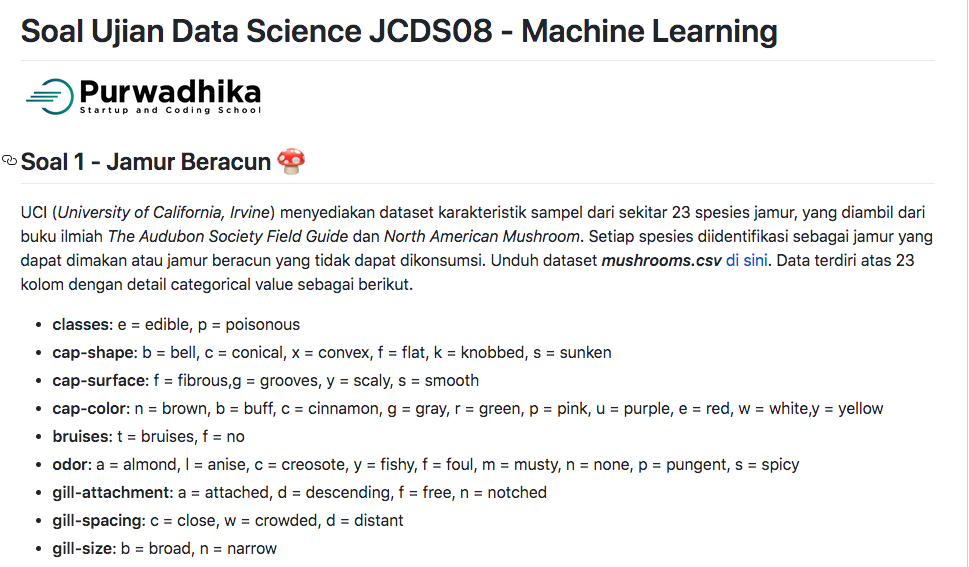

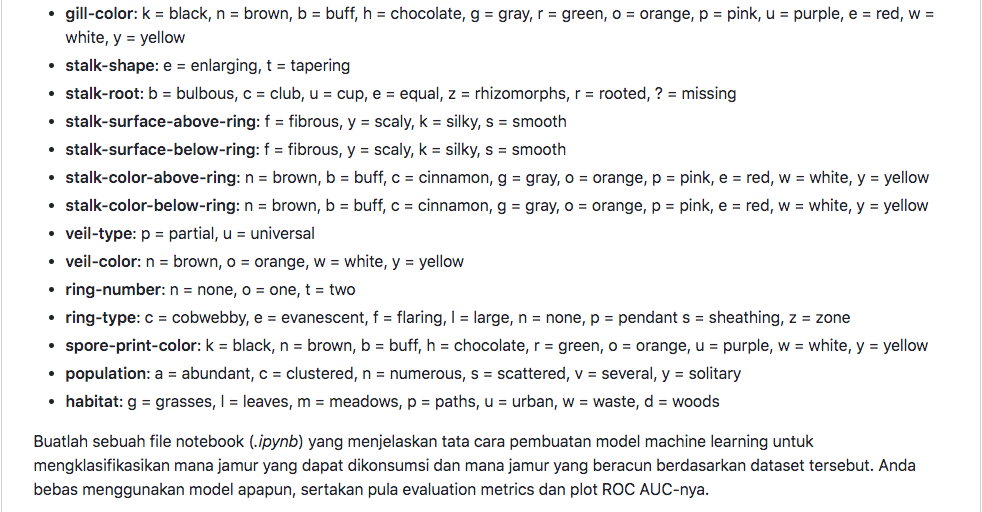

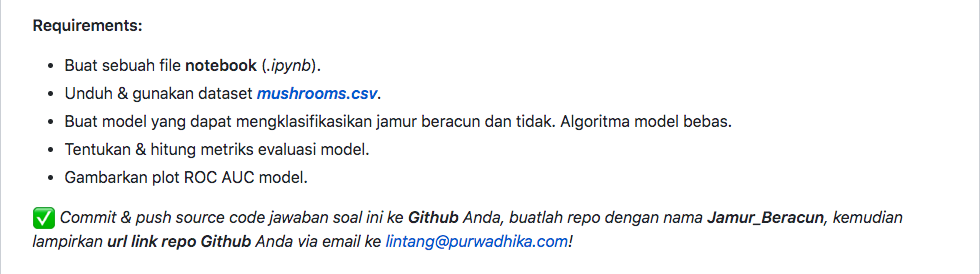

<hr>

In [113]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

__Import Dataset__

In [3]:
dfJamur = pd.read_csv('./dataset/mushrooms.csv')
dfJamur

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
dfJamur[dfJamur['class'] == 'e']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


__List column feature__

In [5]:
list_column = list(dfJamur.columns)
list_column

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

__Create Label Encoder, make new DataFrame__

In [6]:
label = LabelEncoder()

In [50]:
dfJamur2 = pd.DataFrame()
for i in range(len(list_column)): 
    label = LabelEncoder()
    label.fit(dfJamur[list_column[i]]) 
    dfJamur2[list_column[i]] = label.transform(dfJamur[list_column[i]])

dfJamur2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


__Train Test Split Dataset__

In [122]:
xtr, xts, ytr, yts = train_test_split(dfJamur2[list_column[1:]], dfJamur2['class'], test_size=.2)

print(len(xtr), len(xts))

6499 1625


__Hyper Parameter Tuning__

In [123]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}

In [124]:
model = LogisticRegression()

modelrs = RandomizedSearchCV(
    estimator = model,
    param_distributions = param,
    cv = 5
)

modelrs.fit(xtr, ytr)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_iter': [10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'l

In [125]:
modelrs.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 1000}

In [126]:
modelRSbest = LogisticRegression(solver='saga', penalty='none', max_iter= 10000)
modelRSbest.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

__Predict using Model from Hyper Param Tuning__

In [127]:
dfJamur2['predClass'] = modelRSbest.predict(dfJamur2[list_column[1:]])
dfJamur2[dfJamur2['class'] != dfJamur2['predClass']]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,predClass
29,0,5,2,9,1,0,1,1,1,5,...,7,7,0,2,1,4,3,4,0,1
36,0,4,0,3,0,5,1,0,1,4,...,7,7,0,2,1,4,2,4,5,1
60,0,4,0,3,0,5,1,0,1,4,...,7,7,0,2,1,4,3,4,5,1
69,0,5,0,3,0,5,1,0,1,7,...,7,7,0,2,1,4,3,4,5,1
89,0,4,0,4,0,5,1,0,1,5,...,7,7,0,2,1,4,3,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,0,2,3,4,0,5,1,1,1,10,...,7,4,0,2,1,0,7,4,2,1
5970,0,5,3,6,0,5,1,0,1,9,...,7,7,0,2,1,1,1,5,0,1
5980,0,2,3,8,0,5,1,0,1,10,...,7,7,0,2,1,1,1,5,0,1
5982,1,2,2,5,1,5,1,0,0,8,...,7,7,0,2,2,4,5,4,1,0


In [128]:
predTest = modelRSbest.predict(xts)

In [142]:
print("Akurasi =", accuracy_score(y_true = yts, y_pred=predTest) * 100, "%")

Akurasi = 96.49230769230769 %


__Evaluation Metrics__

In [130]:
print(classification_report(yts, predTest))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       865
           1       0.96      0.97      0.96       760

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



### ROC AUC

In [131]:
dfROCAUC = pd.DataFrame()
dfROCAUC['classLabel'] = dfJamur2['class']

In [132]:
dfROCAUC['proba'] = modelRSbest.predict_proba(dfJamur2[list_column[1:]])[:, 1]
dfROCAUC

,classLabel,proba
0,1,9.552385e-01
1,0,1.808748e-01
2,0,1.158849e-02
3,1,9.478482e-01
4,0,1.746255e-23
...,...,...
8119,0,3.708426e-03
8120,0,3.458529e-21
8121,0,8.743991e-03
8122,1,9.203180e-01


In [133]:
for i in range(1, 10):
  dfROCAUC[f'class"{i/10}'] = dfROCAUC['proba'].apply(lambda x: 1 if (x > (i/10)) else 0)

dfROCAUC

,classLabel,proba,"class""0.1","class""0.2","class""0.3","class""0.4","class""0.5","class""0.6","class""0.7","class""0.8","class""0.9"
0,1,9.552385e-01,1,1,1,1,1,1,1,1,1
1,0,1.808748e-01,1,0,0,0,0,0,0,0,0
2,0,1.158849e-02,0,0,0,0,0,0,0,0,0
3,1,9.478482e-01,1,1,1,1,1,1,1,1,1
4,0,1.746255e-23,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3.708426e-03,0,0,0,0,0,0,0,0,0
8120,0,3.458529e-21,0,0,0,0,0,0,0,0,0
8121,0,8.743991e-03,0,0,0,0,0,0,0,0,0
8122,1,9.203180e-01,1,1,1,1,1,1,1,1,1


__ROC AUC Plot__

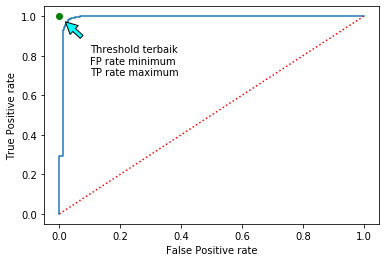

In [147]:
fpr, tpr, thres = roc_curve(dfROCAUC['classLabel'], modelRSbest.predict_proba(dfJamur2[list_column[1:]])[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.plot(0, 1, 'go')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.annotate('Threshold terbaik\nFP rate minimum\nTP rate maximum', 
            xy=(0, 1), xytext=(.1, .7), arrowprops=dict(facecolor='cyan', shrink=.2)
            )
plt.show()

In [145]:
print("ROC AUC Score = ", roc_auc_score(dfROCAUC['classLabel'], modelRSbest.predict(dfJamur2[list_column[1:]])) * 100, "%")

ROC AUC Score =  97.21717862177981 %
